### 1. Usage 

In [1]:
"""
The current code given is for the Assignment 1.
You will be expected to use this to make trees for:
> discrete input, discrete output
> real input, real output
> real input, discrete output
> discrete input, real output
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *

np.random.seed(42)
# Test case 1
# Real Input and Real Output

N = 30
P = 5
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series(np.random.randn(N))


for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("RMSE: ", rmse(y_hat, y))
    print("MAE: ", mae(y_hat, y))

# # Test case 2
# # Real Input and Discrete Output

N = 30
P = 5
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series(np.random.randint(P, size=N), dtype="category")

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("Accuracy: ", accuracy(y_hat, y))
    for cls in y.unique():
        print("Precision: ", precision(y_hat, y, cls))
        print("Recall: ", recall(y_hat, y, cls))


# Test case 3
# Discrete Input and Discrete Output

N = 30
P = 5
X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(5)})
y = pd.Series(np.random.randint(P, size=N), dtype="category")

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("Accuracy: ", accuracy(y_hat, y))
    for cls in y.unique():
        print("Precision: ", precision(y_hat, y, cls))
        print("Recall: ", recall(y_hat, y, cls))

# Test case 4
# Discrete Input and Real Output

N = 30
P = 5
X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(5)})
y = pd.Series(np.random.randn(N))

for criteria in ["information_gain", "gini_index"]:
    tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
    tree.fit(X, y)
    y_hat = tree.predict(X)
    tree.plot()
    print("Criteria :", criteria)
    print("RMSE: ", rmse(y_hat, y))
    print("MAE: ", mae(y_hat, y))


done building
?(X1 <= -1.1939721441501923)
    Y: Prediction: 2.720169166589619
    N: ?(X4 <= 0.3865751136808898)
        Y: ?(X0 <= 1.5077915869695468)
            Y: ?(X4 <= -1.7439789939378834)
                Y: ?(X1 <= 0.8125418173520702)
                    Y: Prediction: 0.534667267785164
                    N: Prediction: 0.9633761292443218
                N: ?(X2 <= 1.24071347131677)
                    Y: Prediction: -0.345994377277823
                    N: Prediction: 0.82206015999449
            N: ?(X0 <= 1.870195015413759)
                Y: Prediction: 1.4535340771573169
                N: Prediction: 0.8271832490360238
        N: ?(X0 <= -0.35665559739723524)
            Y: ?(X0 <= -0.4904656407149133)
                Y: ?(X0 <= -0.5517318279069667)
                    Y: Prediction: 1.8657745111447566
                    N: Prediction: 1.8967929826539474
                N: Prediction: 1.158595579007404
            N: ?(X4 <= 1.003272324809155)
                Y: ?(X0

### 2. Classification Task

#### 2(a)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.datasets import make_classification

np.random.seed(42)

# Code given in the question
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# For plotting
# plt.scatter(X[:, 0], X[:, 1], c=y)

# Write the code for Q2 a) and b) below. Show your results.

X = pd.DataFrame(X)
y = pd.Series(y, dtype="category")
criteria = "gini_index"
tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
train_data_size = int(0.7*(len(X)))

X_train, y_train, X_test, y_test = X[:train_data_size], y[:train_data_size], X[train_data_size:], y[train_data_size:]
tree.fit(X_train, y_train)
y_hat = tree.predict(X_test)
tree.plot()
print("Criteria :", criteria)
# print(y_hat.shape, y_test.shape)
print("Accuracy: ", accuracy(y_hat, y_test))
for cls in y.unique():

    print("Precision: ", precision(y_hat, y_test, cls))
    print("Recall: ", recall(y_hat, y_test, cls))




done building
?(X0 <= 0.043777523046321265)
    Y: ?(X0 <= -0.17186200022530262)
        Y: ?(X1 <= 1.3334978201484127)
            Y: ?(X1 <= -1.0534230074515962)
                Y: ?(X0 <= -0.23210583396758255)
                    Y: Prediction: 1
                    N: Prediction: None
                N: ?(X1 <= -0.2335452640026076)
                    Y: Prediction: None
                    N: Prediction: None
            N: Prediction: 1
        N: ?(X0 <= -0.009944371488954856)
            Y: ?(X0 <= -0.02217129486290728)
                Y: ?(X0 <= -0.15154643493571088)
                    Y: Prediction: 1
                    N: Prediction: None
                N: Prediction: 1
            N: Prediction: None
    N: Prediction: 1
Criteria : gini_index
Accuracy:  0.9
Precision:  0.8947368421052632
Recall:  0.9444444444444444
Precision:  0.9090909090909091
Recall:  0.8333333333333334


#### 2(b)

In [3]:
print(50*"-", "cross validation", 50*"-")

K = 5
fold_size = len(X)//K
score = 0
depths = [2,3,5,6,7]
best_depth = None
best_score = 0
for depth in depths:
    for i in range(K):
        X_test_k = X[i*fold_size: (i+1)*fold_size]
        y_test_k = y[i*fold_size: (i+1)*fold_size]
        X_train_k = pd.concat([X[:i*fold_size], X[(i+1)*fold_size:]])
        y_train_k = pd.concat([y[:i*fold_size], y[(i+1)*fold_size:]])
        tree = DecisionTree(criterion=criteria, max_depth=depth)
        tree.fit(X_train_k, y_train_k)
        y_hat = tree.predict(X_test_k)
        score += accuracy(y_hat, y_test_k) / K
    if score > best_score:
        best_score = score
        best_depth = depth
    score = 0

print(best_depth, best_score)

-------------------------------------------------- cross validation --------------------------------------------------
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
done building
2 0.9099999999999999


### 3. Auto Efficiency task

#### 3(a)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *

np.random.seed(42)

# Reading the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
data = pd.read_csv(url, delim_whitespace=True, header=None,
                 names=["mpg", "cylinders", "displacement", "horsepower", "weight",
                        "acceleration", "model year", "origin", "car name"])

# Clean the above data by removing redundant columns and rows with junk values
# Compare the performance of your model with the decision tree module from scikit learn

data = data[~(data == '?').any(axis=1)].reset_index(drop = True)

X = data.drop(columns = ["mpg","car name"])
y = data["mpg"]

X['horsepower'] = data["horsepower"].astype("float")

criteria = "entropy"
tree = DecisionTree(criterion=criteria)  # Split based on Inf. Gain
train_data_size = int(0.7*(len(X)))

X_train, y_train, X_test, y_test = X[:train_data_size], y[:train_data_size], X[train_data_size:], y[train_data_size:]
tree.fit(X_train, y_train)
y_hat = tree.predict(X_test)
# tree.plot()
print(y_hat.shape, y_test.shape)
print("RMSE: ", rmse(y_hat, y))
print("MAE: ", mae(y_hat, y))


done building
(118,) (118,)
RMSE:  11.57088889502843
MAE:  9.30339753466872


#### 3(b)

In [5]:
print(50*"-", "sklearn", 50*"-")

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = DecisionTreeRegressor(criterion="squared_error", max_depth=5)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_hat)))
print("MAE: ", mean_absolute_error(y_test, y_hat))

-------------------------------------------------- sklearn --------------------------------------------------
RMSE:  6.844898991342224
MAE:  5.2853543913713406


### Time complexity Analysis Task

DD
Average time taken for fit:  0.4915590286254883
Average time taken for predict:  0.0015004873275756836
Standard deviation for fit:  0.22863268852233887
Standard deviation for predict:  0.0004903078079223633
DR
Average time taken for fit:  1.419792652130127
Average time taken for predict:  0.0010010004043579102
Standard deviation for fit:  0.18703317642211914
Standard deviation for predict:  0.0010010004043579102
DD
Average time taken for fit:  1.3779901266098022
Average time taken for predict:  0.0023421049118041992
Standard deviation for fit:  0.1443392038345337
Standard deviation for predict:  0.0003415346145629883
DR
Average time taken for fit:  2.513383150100708
Average time taken for predict:  0.0014976263046264648
Standard deviation for fit:  0.2862884998321533
Standard deviation for predict:  0.0004976987838745117
DD
Average time taken for fit:  2.05108106136322
Average time taken for predict:  0.002377748489379883
Standard deviation for fit:  0.16179096698760986
Standard dev

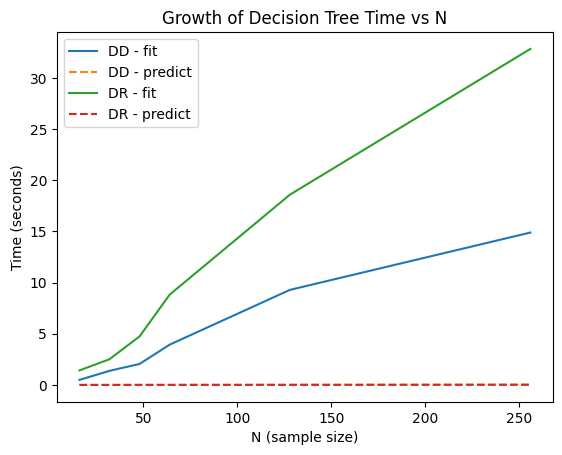

DD
Average time taken for fit:  0.3907182216644287
Average time taken for predict:  0.002057194709777832
Standard deviation for fit:  0.029902219772338867
Standard deviation for predict:  4.0411949157714844e-05
DR
Average time taken for fit:  0.7239943742752075
Average time taken for predict:  0.001997828483581543
Standard deviation for fit:  0.0425337553024292
Standard deviation for predict:  1.3113021850585938e-06
DD
Average time taken for fit:  1.0084505081176758
Average time taken for predict:  0.0024966001510620117
Standard deviation for fit:  0.002873659133911133
Standard deviation for predict:  0.0005003213882446289
DR
Average time taken for fit:  2.1605271100997925
Average time taken for predict:  0.005190372467041016
Standard deviation for fit:  0.006833910942077637
Standard deviation for predict:  0.0021889209747314453
DD
Average time taken for fit:  1.8120959997177124
Average time taken for predict:  0.003970503807067871
Standard deviation for fit:  0.17625105381011963
Stand

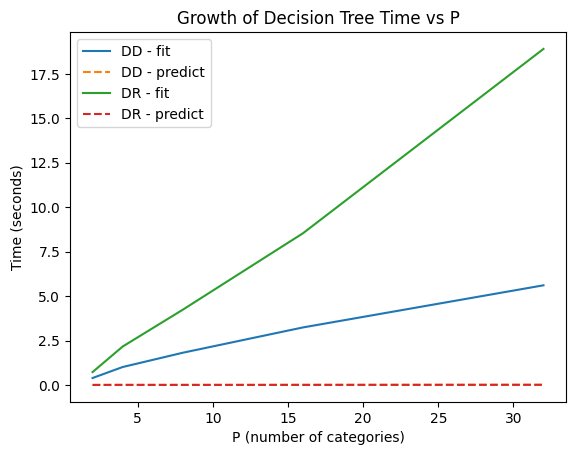

In [5]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
import time

def time_taken(N = 30, M = 5, P = 2):
    tasks = ["DD", "DR"]
    time_taken_for_fit = {x: [] for x in tasks}
    time_taken_for_predict = {x: [] for x in tasks}
    num_average_time = 2
    for i in range(num_average_time):
        for task in tasks:
            if task == "RR":
                X = pd.DataFrame({i: pd.Series(np.random.randn(N), dtype="category") for i in range(M)})
                y = pd.Series(np.random.randn(N), dtype="category")
                tree = DecisionTree(criterion="information_gain")  # Split based on Inf. Gain
                start = time.time()
                tree.fit(X, y)
                end = time.time()
                time_taken_for_fit[task].append(end - start)
                start = time.time()
                y_hat = tree.predict(X)
                end = time.time()
                time_taken_for_predict[task].append(end - start)
            elif task == "RD":
                X = pd.DataFrame({i: pd.Series(np.random.randn(N), dtype="category") for i in range(M)})
                y = pd.Series(np.random.randint(P, size=N), dtype="category")
                tree = DecisionTree(criterion="information_gain")  # Split based on Inf. Gain
                start = time.time()
                tree.fit(X, y)
                end = time.time()
                time_taken_for_fit[task].append(end - start)
                start = time.time()
                y_hat = tree.predict(X)
                end = time.time()
                time_taken_for_predict[task].append(end - start)
            elif task == "DD":

                X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(M)})
                y = pd.Series(np.random.randint(P, size=N), dtype="category")
                tree = DecisionTree(criterion="information_gain")  # Split based on Inf. Gain
                start = time.time()
                tree.fit(X, y)
                end = time.time()
                time_taken_for_fit[task].append(end - start)
                start = time.time()
                y_hat = tree.predict(X)
                end = time.time()
                time_taken_for_predict[task].append(end - start)
            elif task == "DR":
                X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(M)})
                y = pd.Series(np.random.randn(N), dtype="category")
                tree = DecisionTree(criterion="information_gain")  # Split based on Inf. Gain
                start = time.time()
                tree.fit(X, y)
                end = time.time()
                time_taken_for_fit[task].append(end - start)
                start = time.time()
                y_hat = tree.predict(X)
                end = time.time()
                time_taken_for_predict[task].append(end - start)

    # Function to calculate average time (and std) taken by fit() and predict() for different N and P for 4 different cases of DTs
    avg_fit_time = {}
    avg_predict_time = {}
    for task in tasks:
        avg_fit_time[task] = np.mean(time_taken_for_fit[task])
        avg_predict_time[task] = np.mean(time_taken_for_predict[task])
        print(task)
        print("Average time taken for fit: ", np.mean(time_taken_for_fit[task]))
        print("Average time taken for predict: ", np.mean(time_taken_for_predict[task]))
        print("Standard deviation for fit: ", np.std(time_taken_for_fit[task]))
        print("Standard deviation for predict: ", np.std(time_taken_for_predict[task]))
    

    return avg_fit_time, avg_predict_time

def plot_time_growth(N_values=None, M_values=None):
    if N_values is None:
        N_values = [16, 32, 48, 64, 128, 256]
    if M_values is None:
        M_values = [2, 4, 8, 16, 32]

    tasks = ["DD", "DR"]

    results_fit = {task: [] for task in tasks}
    results_predict = {task: [] for task in tasks}

    for N in N_values:
        avg_fit, avg_predict = time_taken(N=N, M=5)
        for task in tasks:
            results_fit[task].append(avg_fit[task])
            results_predict[task].append(avg_predict[task])
    
    for task in tasks:
        plt.plot(N_values, results_fit[task], label=f"{task} - fit")
        plt.plot(N_values, results_predict[task], linestyle="--", label=f"{task} - predict")

    plt.xlabel("N (sample size)")
    plt.ylabel("Time (seconds)")
    plt.title("Growth of Decision Tree Time vs N")
    plt.legend()
    plt.show()

    results_fit = {task: [] for task in tasks}
    results_predict = {task: [] for task in tasks}

    for M in M_values:
        avg_fit, avg_predict = time_taken(N=32, M=M)
        for task in tasks:
            results_fit[task].append(avg_fit[task])
            results_predict[task].append(avg_predict[task])

    for task in tasks:
        plt.plot(M_values, results_fit[task], label=f"{task} - fit")
        plt.plot(M_values, results_predict[task], linestyle="--", label=f"{task} - predict")

    plt.xlabel("P (number of categories)")
    plt.ylabel("Time (seconds)")
    plt.title("Growth of Decision Tree Time vs P")
    plt.legend()
    plt.show()


plot_time_growth()

### Theoretical Time complexity comes out to be $O(N^2.M.log(N))$, where $N, M$ are number of samples and number of features respectiverly. The time grows quadraticaly as N increases and linearly as M increases.

### In the first plot, we can see the fitting curves seem to be little quadratic in the beginning, and in the second plot the curves are pretty linear.